In [1]:
# load the data

from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [2]:
import plaidml.keras
plaidml.keras.install_backend()
from keras import backend as K

import pandas as pd
import numpy as np
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical


from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

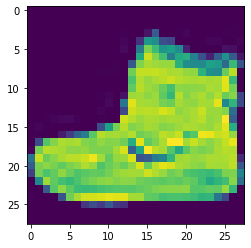

In [4]:
plt.imshow(x_train[0])

In [5]:
# get the label

y_train[0]

9

In [6]:
# check for scaling of colors

x_train.max()

255

In [7]:
# rescale 
x_train = x_train/255
x_test = x_test/255

In [8]:
# check the shape

x_train.shape

(60000, 28, 28)

In [9]:
# reshape to size and channel

x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [10]:
# check label images

y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
# convert labels to categorical

y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

# Make the Model

In [12]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(x_train,y_cat_train,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 21s 350us/sample - loss: 0.4005 - accuracy: 0.8575
Epoch 2/10
60000/60000 [==============================] - 23s 384us/sample - loss: 0.2790 - accuracy: 0.8980
Epoch 3/10
60000/60000 [==============================] - 26s 437us/sample - loss: 0.2397 - accuracy: 0.9139
Epoch 4/10
60000/60000 [==============================] - 23s 376us/sample - loss: 0.2144 - accuracy: 0.9224
Epoch 5/10
60000/60000 [==============================] - 22s 366us/sample - loss: 0.1968 - accuracy: 0.9297
Epoch 6/10
60000/60000 [==============================] - 22s 364us/sample - loss: 0.1824 - accuracy: 0.9342
Epoch 7/10
60000/60000 [==============================] - 22s 367us/sample - loss: 0.1687 - accuracy: 0.9412
Epoch 8/10
60000/60000 [==============================] - 22s 360us/sample - loss: 0.1596 - accuracy: 0.9444
Epoch 9/10
60000/60000 [==============================] - 22s 365us/sample - loss: 0.1469 - accuracy: 0.9

# Evaluate Model

In [15]:
model.metrics_names

['loss', 'accuracy']

In [29]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy
0,0.400547,0.857517
1,0.279026,0.898017
2,0.239745,0.913933
3,0.214367,0.922400
4,0.196758,0.929733
5,0.182351,0.934200
6,0.168692,0.941167
7,0.159569,0.944400
8,0.146852,0.948200
9,0.139889,0.951250


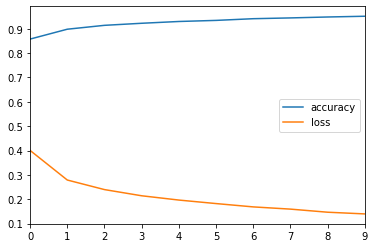

In [31]:
metrics[['accuracy', 'loss']].plot()

In [16]:
model.evaluate(x_test,y_cat_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3548026935428381, 0.9032]

In [17]:
predictions = model.predict_classes(x_test)

In [18]:
y_cat_test.shape

(10000, 10)

In [20]:
# examine one - check one hot encoding

y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [21]:
# check a prediction

predictions[0]

9

In [22]:
# y test is an array of labels

y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [23]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1000
           1       1.00      0.96      0.98      1000
           2       0.82      0.87      0.85      1000
           3       0.94      0.88      0.91      1000
           4       0.86      0.86      0.86      1000
           5       0.96      0.98      0.97      1000
           6       0.72      0.76      0.74      1000
           7       0.98      0.93      0.95      1000
           8       0.98      0.97      0.98      1000
           9       0.94      0.98      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



In [24]:
# does pretty well except for cateogry 6